In [2]:
import numpy as np
import pandas as pd

m = 3
L = np.random.randint(1, 100, size=(m, m))
np.fill_diagonal(L, 0)
print(L)

[[ 0 19 97]
 [72  0 87]
 [ 3 40  0]]


In [37]:
def brute_force(M, inds, dist):
    lvl = len(inds)
    d = []
    for i in range(M.shape[1]):
        if i not in inds and i!=lvl:
            if lvl == (len(M)-1):
                return [dist+M[lvl, i]]
            d = d + brute_force(M, inds+[i], dist+M[lvl, i])
    return d

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

In [39]:
G = nx.DiGraph(L)

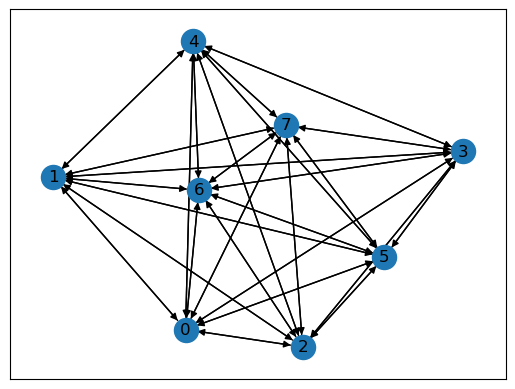

In [40]:
nx.draw_networkx(G)
plt.show()

In [4]:
from AntAlgorithm import AntAlgorithm

a = 1 
b = 1  
rho = 0.7
Q = 1
e = 0

aa = AntAlgorithm(a=a, 
                  b=b,
                  rho=rho,
                  e=e,
                  Q=Q,
                  random_seed=7)

In [41]:
%%time
tao = aa.fit(L)
best_route = aa.get_best_route()
best_dist = aa.get_best_dist()

formatted_route = [(int(city) + 1) for city in best_route]
print(f"Лучший путь: {formatted_route}")
print(f"Общая длина пути: {best_dist}")

pairs = [(formatted_route[i], formatted_route[i + 1]) for i in range(len(formatted_route) - 1)]
pairs.append((formatted_route[-1], formatted_route[0])) 

print("Путь в виде пар (a; b):", pairs)

Лучший путь: [3, 5, 7, 8, 6, 4, 1, 2]
Общая длина пути: 170.0
Путь в виде пар (a; b): [(3, 5), (5, 7), (7, 8), (8, 6), (6, 4), (4, 1), (1, 2), (2, 3)]
CPU times: total: 1.25 s
Wall time: 1.23 s


In [42]:
%%time
print(min(brute_force(L, [], 0)))

153
CPU times: total: 78.1 ms
Wall time: 85 ms


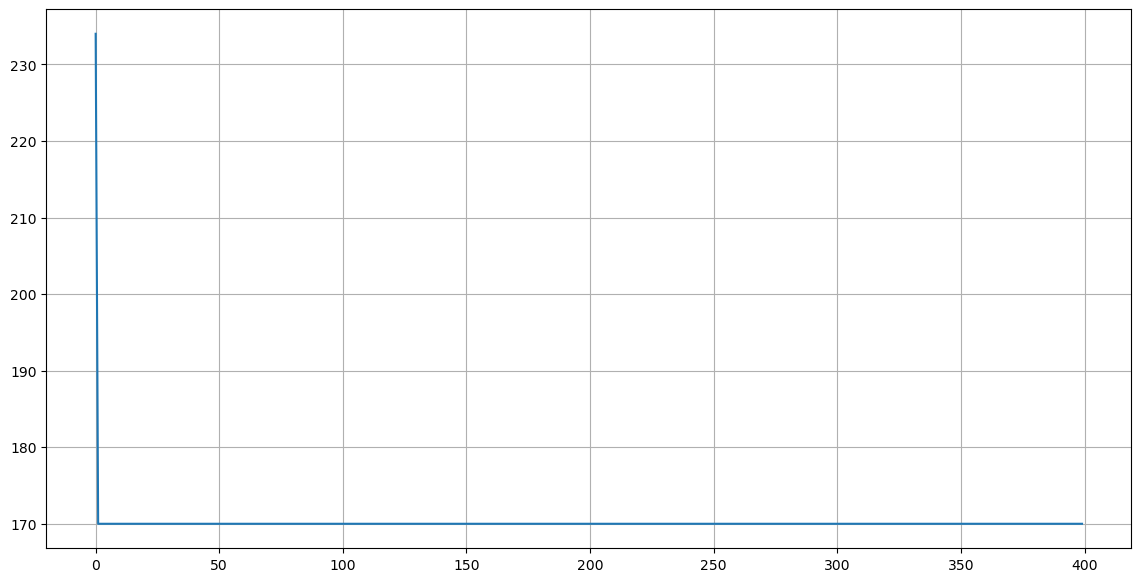

In [43]:
import matplotlib.pyplot as plt

x, y = aa.get_average_dists()
_, y_best = aa.get_best_dists()
plt.figure(figsize=(14,7))
# plt.plot(x, y)
plt.plot(x, y_best)
plt.grid()

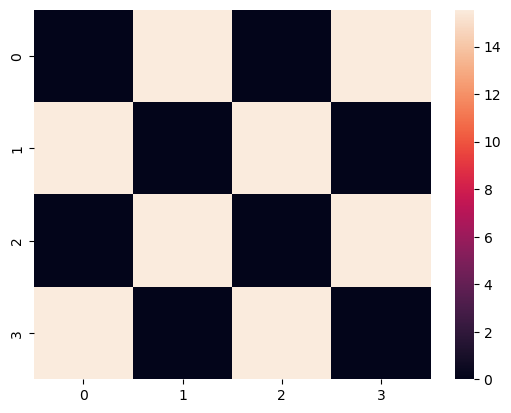

In [19]:
import seaborn as sns

sns.heatmap(tao);

In [5]:
from time import time
results = []

A = [1, 2]
B = [1, 2]
E = [2, 5, 10]
RHO = [0.5, 0.7, 0.9]

for a in A:
    for b in B:
        for e in E:
            for rho in RHO:
                start_time = time()
                aa = AntAlgorithm(a=a, b=b, e=e, rho=rho, Q=1, random_seed=7)
                aa.fit(L)
                best_dist = aa.get_best_dist()
                results.append([a, b, e, rho, time() - start_time, best_dist])

df = pd.DataFrame(results, columns=['a', 'b', 'e', 'rho', "time", 'best_dist'])

c:\Users\Lostg\OneDrive\Рабочий стол\пд\AntAlgorithm.py:74: RuntimeWarning: divide by zero encountered in divide
  rev_L = 1/L


In [6]:
df.sort_values(by="time")

,a,b,e,rho,time,best_dist
18,2,1,2,0.5,0.064960,109.0
32,2,2,5,0.9,0.065958,109.0
33,2,2,10,0.5,0.065960,109.0
27,2,2,2,0.5,0.066958,109.0
21,2,1,5,0.5,0.066958,109.0
31,2,2,5,0.7,0.066959,109.0
22,2,1,5,0.7,0.067956,109.0
15,1,2,10,0.5,0.067958,109.0
20,2,1,2,0.9,0.067959,109.0
26,2,1,10,0.9,0.067960,109.0


In [2]:
import numpy as np
L = np.random.randint(1, 50, size=(10, 10))
np.fill_diagonal(L, 0)
print(L)

[[ 0 12 13  3 24 21 35 38 42 16]
 [35  0 41 10 21 40 44 30 44 34]
 [37 47  0 22 34 45 24  4 40 17]
 [33 29 18  0 40 25  5 44 31 49]
 [11 31 43  4  0 16 37 48 13 24]
 [47  8 43 17  8  0 35  2 19 46]
 [20 21 29 18 42 28  0  9 34 10]
 [14  1 39 49  6 34 27  0 29 12]
 [35 41 36 13 46  4  9  4  0 23]
 [41 10 40 21 24 18 18 10 35  0]]


In [13]:
from AntAlgorithm import AntAlgorithm
x=[]
A = [0.5, 1, 2]
B = [1, 2, 5, 10]

for a in A:
    for b in B:
        aa = AntAlgorithm(a=a, b=b,
                  Q=1,
                  random_seed=7)
        aa.fit(L)
        x = x + [[a, b, aa.get_best_dist()]]
print(x)

[[0.5, 1, 64.0], [0.5, 2, 64.0], [0.5, 5, 64.0], [0.5, 10, 64.0], [1, 1, 77.0], [1, 2, 64.0], [1, 5, 64.0], [1, 10, 77.0], [2, 1, 87.0], [2, 2, 64.0], [2, 5, 64.0], [2, 10, 64.0]]


In [10]:
from AntAlgorithm import AntAlgorithm
x=[]
E = [2, 5, 10]
RHO = [0.5, 0.7, 0.9]

for rho in RHO:
    for e in E:
        aa = AntAlgorithm(a=1, b=1, 
                          e=e, rho=rho,
                          Q=1,
                          random_seed=7)
        aa.fit(L)
        x = x + [[rho, e, aa.get_best_dist()]]
print(x)

[[0.25, 2, 107.0], [0.25, 5, 109.0], [0.25, 10, 109.0], [0.5, 2, 110.0], [0.5, 5, 109.0], [0.5, 10, 117.0], [0.75, 2, 110.0], [0.75, 5, 109.0], [0.75, 10, 107.0]]


In [11]:
from AntAlgorithm import AntAlgorithm
x=[]
E = [2, 5, 10]
RHO = [0.5, 0.7, 0.9]

for rho in RHO:
    for e in E:
        aa = AntAlgorithm(a=1, b=1, 
                          e=e, rho=rho,
                          Q=1,
                          random_seed=7)
        aa.fit(L)
        x = x + [[rho, e, aa.get_best_dist()]]
print(x)

[[0.5, 2, 110.0], [0.5, 5, 109.0], [0.5, 10, 117.0], [0.7, 2, 107.0], [0.7, 5, 107.0], [0.7, 10, 114.0], [0.9, 2, 118.0], [0.9, 5, 107.0], [0.9, 10, 127.0]]


In [3]:
%%time
print(min(brute_force(L, [], 0)))

91
Wall time: 4.67 s


In [4]:
from AntAlgorithm import AntAlgorithm
aa = AntAlgorithm(a=1, 
                  b=5,
                  rho=0.7,
                  e=5,
                  Q=1,
                  random_seed=7)

In [5]:
%%time
tao = aa.fit(L)
print(aa.get_best_dist())

C:\Users\mrnik\MyAntAlgorithm\AntAlgorithm.py:74: RuntimeWarning: divide by zero encountered in true_divide
  rev_L = 1/L


114.0
Wall time: 1.4 s


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(x, y)
plt.grid()

In [49]:
import pandas as pd

# Data provided by the user
data = {
    "a": [1]*18 + [2]*18,
    "b": [1]*9 + [2]*9 + [1]*9 + [2]*9,
    "e": [2]*3 + [5]*3 + [10]*3 + [2]*3 + [5]*3 + [10]*3 + [2]*3 + [5]*3 + [10]*3 + [2]*3 + [5]*3 + [10]*3,
    "rho": [0.5, 0.7, 0.9]*12,
    "time": [1.334198, 1.158285, 1.131308, 1.100355, 1.139301, 1.373062, 1.213764, 1.114348, 1.494401, 
             1.092875, 1.119890, 1.165387, 1.151725, 1.112098, 1.115963, 1.124881, 1.127043, 1.205502,
             1.142373, 1.128321, 1.212883, 1.205952, 1.263768, 1.290772, 1.095367, 1.276011, 1.336053,
             1.129920, 1.173122, 1.233838, 1.133846, 1.133939, 1.207840, 1.072381, 1.193781, 1.253262],
    "best_dist": [170.0, 159.0, 170.0, 159.0, 159.0, 159.0, 170.0, 170.0, 170.0, 
                  170.0, 170.0, 170.0, 170.0, 170.0, 159.0, 170.0, 159.0, 159.0,
                  170.0, 170.0, 170.0, 170.0, 170.0, 170.0, 170.0, 170.0, 170.0,
                  170.0, 170.0, 170.0, 170.0, 170.0, 170.0, 170.0, 159.0, 170.0]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Saving to Excel
file_path = 'data_table.xlsx'
df.to_excel(file_path, index=False)

file_path


'data_table.xlsx'